# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
#pip install citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: mitsamiouli, City ID: 921786
City Name: colares, City ID: 2269142
City Name: jamestown, City ID: 5122534
City Name: ongandjera, City ID: 3354178
City Name: klaksvik, City ID: 2618795
City Name: whitehorse, City ID: 6180550
City Name: mount isa, City ID: 2065594
City Name: vaini, City ID: 4032243
City Name: pasighat, City ID: 1260206
City Name: tuktoyaktuk, City ID: 6170031
City Name: bandarbeyla, City ID: 64814
City Name: arraial do cabo, City ID: 3471451
City Name: vestmannaeyjar, City ID: 3412093
City Name: alim, City ID: 1731461
City Name: lafiagi, City ID: 2332504
City Name: ponta do sol, City ID: 2264557
City Name: bethel, City ID: 5282297
City Name: airai, City ID: 1651810
City Name: albany, City ID: 5106841
City Name: comarnic, City ID: 681005
That record does not exist, searching for next record...
City Name: pangnirtung, City ID: 6096551
City Name: khor, City ID: 2022317
City Name: inta, City ID: 1505579
City Name: hermanus, City ID: 3366880
City Name: rikitea, City

City Name: saint-joseph, City ID: 6690296
City Name: eyl, City ID: 60019
City Name: immenstadt, City ID: 2861443
City Name: san ramon, City ID: 5392593
City Name: chapais, City ID: 5919850
City Name: bengkulu, City ID: 1649150
City Name: kalianget, City ID: 1641977
City Name: zenzeli, City ID: 463655
City Name: sorland, City ID: 3137469
City Name: sistranda, City ID: 3139597
City Name: bokhan, City ID: 2026544
City Name: narsaq, City ID: 3421719
City Name: bose, City ID: 6457397
City Name: vostok, City ID: 2013279
City Name: padilla, City ID: 3673407
City Name: karangasem, City ID: 1641301
City Name: saldanha, City ID: 3361934
City Name: krutinka, City ID: 1501690
City Name: brewster, City ID: 5110092
City Name: mordovo, City ID: 525365
City Name: pullman, City ID: 5807540
City Name: mitu, City ID: 3674676
City Name: golovino, City ID: 560646
City Name: lamont, City ID: 5364916
City Name: lavrentiya, City ID: 4031637
City Name: kamaishi, City ID: 2112444
That record does not exist, sea

City Name: carutapera, City ID: 3402648
City Name: laje, City ID: 3459088
City Name: tabou, City ID: 2281120
City Name: bridlington, City ID: 2654728
City Name: banfora, City ID: 2362909
City Name: warmbad, City ID: 3352263
City Name: alofi, City ID: 4036284
City Name: burns lake, City ID: 5911745
City Name: fare, City ID: 4034496
City Name: shingu, City ID: 1847947
City Name: ivanteyevka, City ID: 555111
City Name: bath, City ID: 2656173
City Name: qaqortoq, City ID: 3420846
City Name: jiangdu, City ID: 1787227
City Name: teacapan, City ID: 3982287
City Name: anori, City ID: 3665315
City Name: hit, City ID: 95788
City Name: tura, City ID: 1254046
City Name: hambantota, City ID: 1244926
City Name: moyale, City ID: 186180
City Name: paciran, City ID: 1633442
City Name: pandan, City ID: 1695546
City Name: gua musang, City ID: 1734651
City Name: progreso, City ID: 3521108
City Name: mahebourg, City ID: 934322
That record does not exist, searching for next record...
City Name: yumen, City 

City Name: valparaiso, City ID: 3868626


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,921786,Mitsamiouli,KM,-11.3847,43.2844,78.44,65,4,9.04
1,2269142,Colares,PT,38.7992,-9.4469,58.55,68,20,13.00
2,5122534,Jamestown,US,42.0970,-79.2353,72.57,60,90,5.75
3,3354178,Ongandjera,NA,-17.8833,15.0667,66.49,35,0,6.51
4,2618795,Klaksvík,FO,62.2266,-6.5890,47.32,84,48,12.01


In [5]:
cities_df

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,921786,Mitsamiouli,KM,-11.3847,43.2844,78.44,65,4,9.04
1,2269142,Colares,PT,38.7992,-9.4469,58.55,68,20,13.00
2,5122534,Jamestown,US,42.0970,-79.2353,72.57,60,90,5.75
3,3354178,Ongandjera,NA,-17.8833,15.0667,66.49,35,0,6.51
4,2618795,Klaksvík,FO,62.2266,-6.5890,47.32,84,48,12.01
...,...,...,...,...,...,...,...,...,...
575,1852357,Shimoda,JP,34.6667,138.9500,64.11,85,100,7.34
576,510911,Pervomayskiy,RU,53.2485,40.2871,57.07,74,97,6.40
577,2293428,Adiaké,CI,5.2863,-3.3040,81.99,84,46,9.95
578,3386931,Tamandaré,BR,-8.7597,-35.1047,77.07,74,96,7.18


In [ ]:
#cities_df.to_csv("output_data/city_weather.csv", index=False, header=True)  #"output_data/cities.csv"

cities_df.to_csv("output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#at this time; Humidity is 0
cities2_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities2_df = cities2_df.rename_axis('City ID')

#Exporting data to csv
cities2_df.to_csv("../output_data/cities.csv")

#Displaying dataframe
cities2_df.head

<bound method NDFrame.head of          City ID          City Country      Lat       Lng  Temperature  \
City ID                                                                  
0         921786   Mitsamiouli      KM -11.3847   43.2844        78.44   
1        2269142       Colares      PT  38.7992   -9.4469        58.55   
2        5122534     Jamestown      US  42.0970  -79.2353        72.57   
3        3354178    Ongandjera      NA -17.8833   15.0667        66.49   
4        2618795      Klaksvík      FO  62.2266   -6.5890        47.32   
...          ...           ...     ...      ...       ...          ...   
575      1852357       Shimoda      JP  34.6667  138.9500        64.11   
576       510911  Pervomayskiy      RU  53.2485   40.2871        57.07   
577      2293428        Adiaké      CI   5.2863   -3.3040        81.99   
578      3386931     Tamandaré      BR  -8.7597  -35.1047        77.07   
579      3868626    Valparaíso      CL -33.0393  -71.6273        69.48   

       

In [12]:
cities2_df

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
City ID,,,,,,,,,
0,921786,Mitsamiouli,KM,-11.3847,43.2844,78.44,65,4,9.04
1,2269142,Colares,PT,38.7992,-9.4469,58.55,68,20,13.00
2,5122534,Jamestown,US,42.0970,-79.2353,72.57,60,90,5.75
3,3354178,Ongandjera,NA,-17.8833,15.0667,66.49,35,0,6.51
4,2618795,Klaksvík,FO,62.2266,-6.5890,47.32,84,48,12.01
...,...,...,...,...,...,...,...,...,...
575,1852357,Shimoda,JP,34.6667,138.9500,64.11,85,100,7.34
576,510911,Pervomayskiy,RU,53.2485,40.2871,57.07,74,97,6.40
577,2293428,Adiaké,CI,5.2863,-3.3040,81.99,84,46,9.95


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


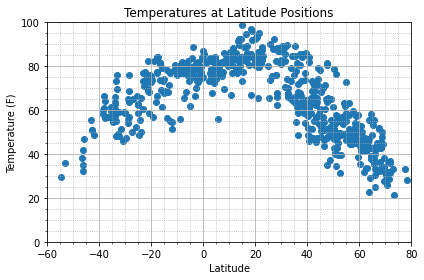

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_temp.png'

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

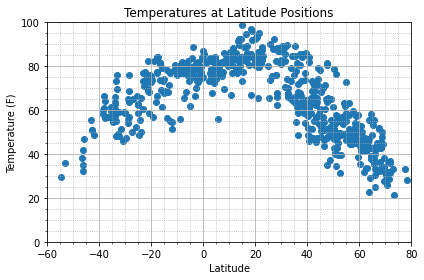

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_temp.png'

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")



## Latitude vs. Humidity Plot

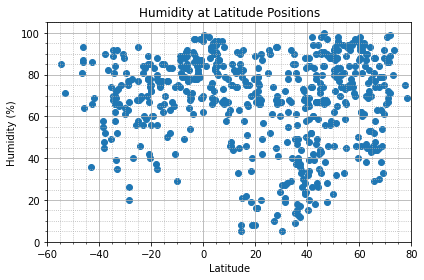

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_humid.png'

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

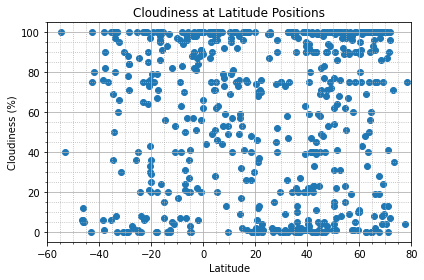

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_clouds.png'

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

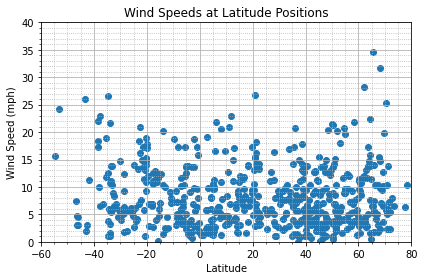

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_wind.png'

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [35]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]


In [50]:
def linear_reg_plot(x_values,y_values):
    x_values = northern_hemisphere["Lat"]
    y_values = northern_hemisphere["Temperature"]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=12,color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Temperature (F)')
    plt.ylim(-5, 100)
    plt.xlim(0, 80)
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-')
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.show()
    plt.savefig("Images/nh_lat_temp_regression.png")

In [51]:

# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = cities_df.loc[cities_df["Lat"]>0]
Southern_hemisphere = cities_df.loc[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

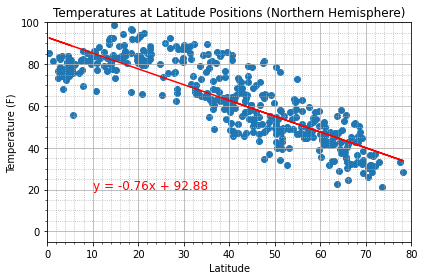

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

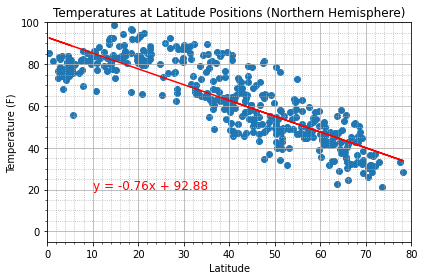

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

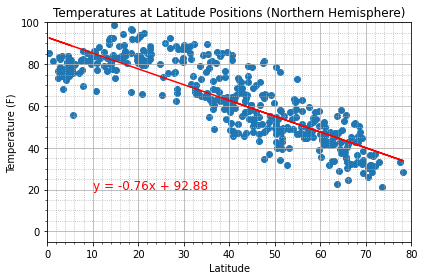

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [54]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity")

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

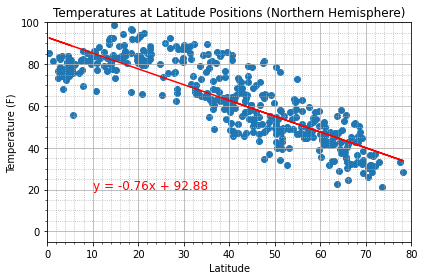

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

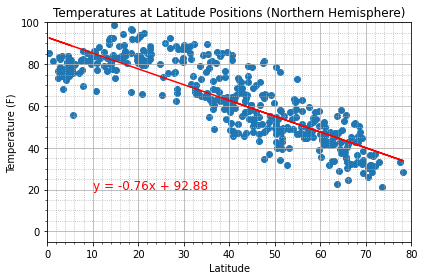

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

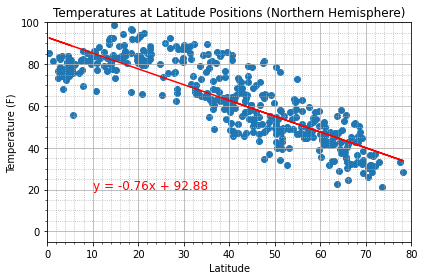

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

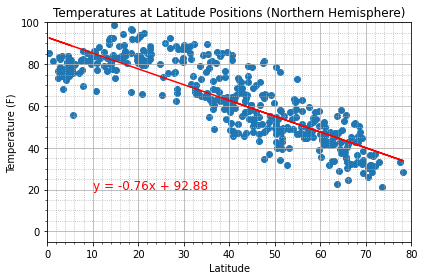

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

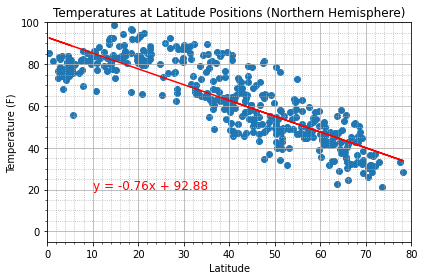

FileNotFoundError: [Errno 2] No such file or directory: 'Images/nh_lat_temp_regression.png'

<Figure size 432x288 with 0 Axes>

In [59]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))